In [75]:
# %pip install pandas
# %pip install numpy
# %pip install matplotlib
# %pip install openpyxl
# %pip install plotly
# %pip install nbformat
# %pip install seaborn

In [2]:
import pandas as pd
import numpy as np

## Run this once
# excel_file_path = '../data/acled/Africa_1997-2023_Sep29.xlsx'
# df = pd.read_excel(excel_file_path, engine='openpyxl')
# df.to_csv('../data/acled/africa.csv', index=False)

## Then run this
df = pd.read_csv('../data/acled/africa.csv')
df.head()

/var/folders/wb/67n5x4vj6qq_n5t85f5bvtww0000gn/T/ipykernel_27107/18426582.py:10: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/acled/africa.csv')


,EVENT_ID_CNTY,EVENT_DATE,YEAR,TIME_PRECISION,DISORDER_TYPE,EVENT_TYPE,SUB_EVENT_TYPE,ACTOR1,ASSOC_ACTOR_1,INTER1,...,LOCATION,LATITUDE,LONGITUDE,GEO_PRECISION,SOURCE,SOURCE_SCALE,NOTES,FATALITIES,TAGS,TIMESTAMP
0,ALG12639,2023-09-26,2023,1,Demonstrations,Protests,Peaceful protest,Protesters (Algeria),Labor Group (Algeria),6,...,Guelma,36.462,7.426,1,El Khabar (Algeria),National,"On 26 September 2023, municipal workers affili...",0,crowd size=no report,1696258811
1,ALG12642,2023-09-26,2023,1,Demonstrations,Protests,Peaceful protest,Protesters (Algeria),Taxi Drivers (Algeria),6,...,Blida,36.469,2.829,1,El Khabar (Algeria),National,"On 26 September 2023, dozens of taxi drivers h...",0,crowd size=dozens,1696258811
2,ALG12635,2023-09-25,2023,1,Demonstrations,Protests,Peaceful protest,Protesters (Algeria),Farmers (Algeria),6,...,Bouira,36.380,3.901,1,El Watan (Algeria),National,"On 25 September 2023, dozens of potato produce...",0,crowd size=dozens,1696258811
3,ALG12637,2023-09-25,2023,1,Demonstrations,Protests,Peaceful protest,Protesters (Algeria),Health Workers (Algeria),6,...,Deb Deb,29.985,9.434,1,Echorouk,National,"On 25 September 2023, health workers held a pr...",0,crowd size=no report,1696258811
4,ALG12645,2023-09-25,2023,2,Demonstrations,Protests,Peaceful protest,Protesters (Algeria),NaN,6,...,Oued Djemaa,36.044,2.361,1,El Watan (Algeria),National,"Around 25 September 2023 (as reported), studen...",0,crowd size=no report,1696258811


In [3]:
# 336525 rows, 31 columns
df.shape

# want: EVENT_DATE, FATALITIES, 
df.columns

Index(['EVENT_ID_CNTY', 'EVENT_DATE', 'YEAR', 'TIME_PRECISION',
       'DISORDER_TYPE', 'EVENT_TYPE', 'SUB_EVENT_TYPE', 'ACTOR1',
       'ASSOC_ACTOR_1', 'INTER1', 'ACTOR2', 'ASSOC_ACTOR_2', 'INTER2',
       'INTERACTION', 'CIVILIAN_TARGETING', 'ISO', 'REGION', 'COUNTRY',
       'ADMIN1', 'ADMIN2', 'ADMIN3', 'LOCATION', 'LATITUDE', 'LONGITUDE',
       'GEO_PRECISION', 'SOURCE', 'SOURCE_SCALE', 'NOTES', 'FATALITIES',
       'TAGS', 'TIMESTAMP'],
      dtype='object')

In [85]:
events = df['EVENT_TYPE'].value_counts()
subevents = df['SUB_EVENT_TYPE'].value_counts()
locations = df['LOCATION'].value_counts()

print(f"Events: {events}\n")
# print(f"Subevents: {subevents}")
print(f"Locations: {locations}")

Events: EVENT_TYPE
Battles                       86360
Violence against civilians    82688
Protests                      78662
Riots                         37022
Strategic developments        27061
Explosions/Remote violence    24732
Name: count, dtype: int64

Locations: LOCATION
Khartoum             1945
Mogadishu            1713
Mogadishu - Hodan    1515
Cape Town            1430
Harare               1405
                     ... 
Obasari                 1
Eburu                   1
Ryando                  1
Namawanga               1
Maheba                  1
Name: count, Length: 35554, dtype: int64


In [89]:
cdf = df[df['EVENT_TYPE'] == 'Violence against civilians']
cdf_filtered = cdf.loc[:, ['EVENT_DATE', 'LOCATION', 'LATITUDE', 'LONGITUDE', 'NOTES', 'FATALITIES', 'TIMESTAMP']]
# cdf.head()
# cdf_filtered

cdf_fatalities = cdf_filtered[cdf_filtered['FATALITIES'] > 4]
cdf_fatalities_show = cdf_filtered[cdf_filtered['FATALITIES'] > 100]

print(cdf_fatalities.shape)
# cdf_fatalities["FATALITIES"].value_counts()

countries = cdf_fatalities["LOCATION"].value_counts()
print(countries)

beni = cdf_fatalities[cdf_fatalities['LOCATION'] == 'Beni']
print(beni.shape)

(8974, 7)
LOCATION
Beni            67
El Fasher       56
Pibor           50
Bunia           48
Bujumbura       43
                ..
Beroroha         1
Ilambohazo       1
Fianarantsoa     1
Toamasina        1
Chazanga         1
Name: count, Length: 4488, dtype: int64
(67, 7)


In [73]:
import plotly.graph_objs as go

fig = go.Figure()

fig.add_trace(
    go.Scattergeo(
        lon=cdf_fatalities_show["LONGITUDE"],
        lat=cdf_fatalities_show["LATITUDE"],
        mode="markers",
        marker=dict(
            size=cdf_fatalities_show["FATALITIES"] / 20,  # Specify the size for each data point
            opacity=0.3, 
            color='purple',  
        ),
    )
)

fig.update_layout(
    geo=dict(
        scope="africa",
        showcoastlines=True,
        coastlinecolor="Black",
        showland=True,
        landcolor="rgb(229, 229, 229)",
        showocean=True,
        oceancolor="rgb(240, 240, 255)",
    ),
    width=800,  # Adjust the width as needed
    height=600,  # Adjust the height as needed
    title="Africa Map",
)

fig.update_geos(projection_scale=1.09, lonaxis_range=[-30, 60], lataxis_range=[-40, 40])

fig.show()

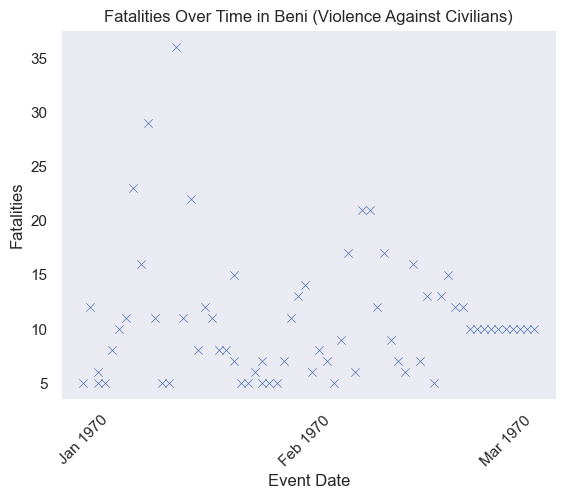

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import MonthLocator, DateFormatter

sns.set(style="dark")
sns.scatterplot(data=beni, x="EVENT_DATE", y="FATALITIES", marker='x')

ax = plt.gca()
ax.xaxis.set_major_locator(MonthLocator(interval=1))  # Show ticks for each month
ax.xaxis.set_major_formatter(DateFormatter("%b %Y"))  # Format tick labels as "Month Year"


plt.title("Fatalities Over Time in Beni (Violence Against Civilians)")
plt.xlabel("Event Date")
plt.ylabel("Fatalities")
plt.xticks(rotation=45)

plt.show()